# Ordenamiento

El ordenamiento de arreglos corresponde a encontrar una permutación tal que cada elemento sea menor a su sucesor. 

In [1]:
def selection_sort(collection):
    length = len(collection)
    for i in range(length):
        least = i
        for k in range(i + 1, length):
            if collection[k] < collection[least]:
                least = k
        collection[least], collection[i] = (collection[i], collection[least])
    return collection

def insertion_sort(collection):
    for index in range(1, len(collection)):
        while 0 < index and collection[index] < collection[index - 1]:
            collection[index], collection[index - 1] = collection[index - 1], collection[index]
            index -= 1
    return collection

In [2]:
insertion_sort([3,2,1])

[1, 2, 3]

In [3]:
import numpy as np
import time

def gen_random(size):
    return np.random.permutation(np.arange(size,dtype=np.int8))

def gen_worst_case(size):
    return np.arange(size,-1,-1,dtype=np.int8)

def gen_best_case(size):
    return np.arange(size,dtype=np.int8)

arr=gen_best_case(1000)

start=time.clock()
insertion_sort(arr.copy())
end=time.clock()
t1=end-start

start=time.clock()
selection_sort(arr.copy())
end=time.clock()
t2=end-start



print('Insertion Sort: %2f'%t1)
print('Selection Sort : %2f'%t2)


Insertion Sort: 0.172960
Selection Sort : 0.136322


In [4]:
def merge_sort(A):
    n=len(A)
    if len(A) <= 1:
      return A
    L = merge_sort(A[0:int(n/2)])
    R = merge_sort(A[int(n/2):n])
    return merge(L, R)

def merge(L, R):
    result = []
    l_idx, r_idx = (0, 0)
    while l_idx < len(L) and r_idx < len(R):
      if L[l_idx] < R[r_idx]:
        result.append(L[l_idx])
        l_idx += 1
      else:
        result.append(R[r_idx])
        r_idx += 1
    result.extend(L[l_idx:len(L)])
    result.extend(R[r_idx:len(R)])
    return result

In [5]:
arr=gen_best_case(10)

print(arr[0:int(10/2)])
print(arr[int(10/2):10])
#sorted_arr=merge_sort(arr)

#print(sorted_arr)

[0 1 2 3 4]
[5 6 7 8 9]


In [29]:
import pandas as pd
import time 
import sys

method=[merge_sort,selection_sort,insertion_sort]
fun=[gen_random,gen_worst_case,gen_best_case]
n_data=[1000,2000,3000,4000,5000]
n_samp=20

s_n=[]
ellapsed_time={m.__name__:[] for m in method}

for i in n_data:
    for j in range(n_samp):
        s_n.append(i)
        arr=gen_random(i)
        for m in method:
            start=time.clock()
            m(arr.copy())
            end=time.clock()
            ellapsed_time[m.__name__].append(end-start)
        

In [30]:
df_list=[]
for m in method:
    df=pd.DataFrame({'n':s_n,'time':ellapsed_time[m.__name__],'method':[m.__name__]*len(ellapsed_time[m.__name__])})
    df_list.append(df)
df=pd.concat(df_list,axis=0)
df.head()

,n,time,method
0,1000,0.012383,merge_sort
1,1000,0.004410,merge_sort
2,1000,0.004256,merge_sort
3,1000,0.004341,merge_sort
4,1000,0.004378,merge_sort


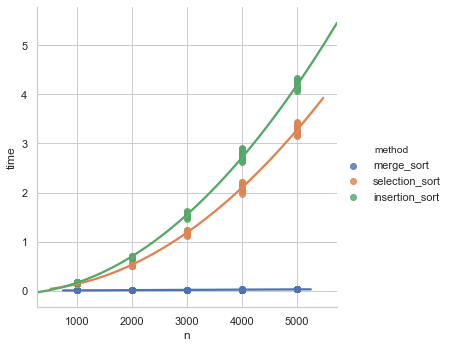

In [31]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

sns.lmplot(x="n", y="time", hue="method",order=2, data=df)
plt.show()

In [32]:
df.groupby(['method','n']).mean()


time
method         n             
insertion_sort 1000  0.169205
               2000  0.679396
               3000  1.540346
               4000  2.741737
               5000  4.181153
merge_sort     1000  0.004767
               2000  0.008988
               3000  0.014789
               4000  0.020640
               5000  0.024345
selection_sort 1000  0.133283
               2000  0.527382
               3000  1.179868
               4000  2.103073
               5000  3.278847

In [11]:
df.groupby(['method','n']).var()

time
method         n                 
insertion_sort 1000  1.687801e-05
               2000  1.017390e-03
merge_sort     1000  2.370000e-10
               2000  1.353433e-08
selection_sort 1000  2.747770e-05
               2000  1.411107e-03

In [33]:
import numpy as np
import statsmodels.formula.api as sm

def get_model(data, quadratic=True):
    if quadratic:
        data['n_squared'] = data.n**2
        model = sm.ols('time ~ n_squared', data=data).fit()
    else: # assume n log(n)
        data['nlogn'] = data.n * np.log(data.n)
        model = sm.ols('time ~ nlogn', data=data).fit()
    return model


In [34]:
model1=get_model(df[df.method=='selection_sort'],True)
model2=get_model(df[df.method=='selection_sort'],False)

In [35]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 5.490e+04
Date:                Thu, 29 Aug 2019   Prob (F-statistic):          1.58e-136
Time:                        10:48:42   Log-Likelihood:                 161.95
No. Observations:                 100   AIC:                            -319.9
Df Residuals:                      98   BIC:                            -314.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0023      0.008      0.292      0.771      -0.013       0.018
n_squared   1.311e-07    5.6e-10    234.313      0.000     1.3e-07    1.32e-07
==============================================================================
Omnibus:                       12.000   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.780
Skew:                           0.541   Prob(JB):                     0.000138
Kurtosis:                       4.760   Cond. No.                     2.26e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     3122.
Date:                Thu, 29 Aug 2019   Prob (F-statistic):           3.95e-76
Time:                        10:48:45   Log-Likelihood:                 20.057
No. Observations:                 100   AIC:                            -36.11
Df Residuals:                      98   BIC:                            -30.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7113      0.043    -16.368      0.000      -0.798      -0.625
nlogn       8.843e-05   1.58e-06     55.875      0.000    8.53e-05    9.16e-05
==============================================================================
Omnibus:                      187.680   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.405
Skew:                           0.271   Prob(JB):                      0.00550
Kurtosis:                       1.515   Cond. No.                     5.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""